# Import libraries

In [31]:
import rasterio
import rioxarray
import numpy as np
import matplotlib.pyplot as plt

# Import Sentinel-2 image

In [32]:
file_path = '../data/raw/sentinel-2/sentinel2_openeo_med_4months_dresden.geotiff'
data = rioxarray.open_rasterio(file_path)
data

Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as 

<xarray.DataArray (band: 13, y: 2301, x: 2747)> Size: 164MB
[82171011 values with dtype=int16]
Coordinates:
  * band         (band) int64 104B 1 2 3 4 5 6 7 8 9 10 11 12 13
  * x            (x) float64 22kB 4.003e+05 4.003e+05 ... 4.277e+05 4.277e+05
  * y            (y) float64 18kB 5.671e+06 5.671e+06 ... 5.648e+06 5.648e+06
    spatial_ref  int64 8B 0
Attributes:
    PROCESSING_SOFTWARE:       0.60.1a1
    AREA_OR_POINT:             Area
    STATISTICS_APPROXIMATE:    YES
    STATISTICS_MAXIMUM:        8193
    STATISTICS_MEAN:           528.65708367854
    STATISTICS_MINIMUM:        133
    STATISTICS_STDDEV:         617.88456853251
    STATISTICS_VALID_PERCENT:  97.46
    _FillValue:                -32768
    scale_factor:              1.0
    add_offset:                0.0
    long_name:                 ('B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B0...

In [33]:
# Normalize the bands to the range [0, 1]
def normalize(array):
    array_min, array_max = array.min(), array.max()
    return (array - array_min) / (array_max - array_min)

In [34]:
# Apply a percentile-based contrast stretch (ignore the extreme values so image isn't too dark or too bright)
def contrast_stretch(array, lower_percentile=2, upper_percentile=98):
    lower = np.percentile(array, lower_percentile)
    upper = np.percentile(array, upper_percentile)
    array = np.clip(array, lower, upper) # clip -> limit the values in an array to specific range
    return (array - lower) / (upper - lower)

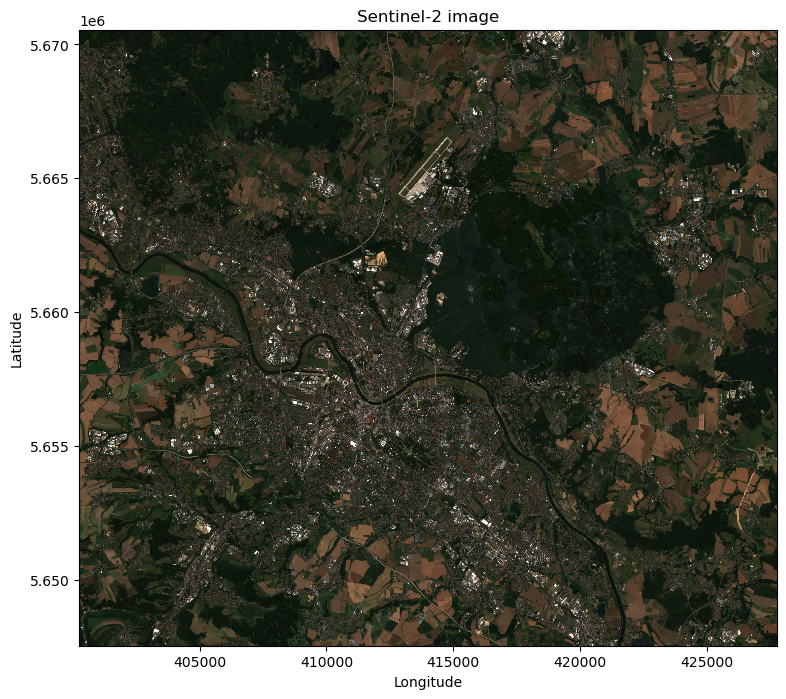

In [35]:
# Plot the raster data
plt.figure(figsize=(9,8))
# normalize(data).sel(band=[4, 3, 2]).plot.imshow()
contrast_stretch(data).sel(band=[4, 3, 2]).plot.imshow()
plt.title("Sentinel-2 image")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# Calculate NDVI

<xarray.DataArray ()> Size: 8B
array(1.33000587)
Coordinates:
    spatial_ref  int64 8B 0 <xarray.DataArray ()> Size: 8B
array(-0.51269036)
Coordinates:
    spatial_ref  int64 8B 0
<xarray.DataArray ()> Size: 2B
array(16152, dtype=int16)
Coordinates:
    band         int64 8B 4
    spatial_ref  int64 8B 0 <xarray.DataArray ()> Size: 2B
array(-281, dtype=int16)
Coordinates:
    band         int64 8B 4
    spatial_ref  int64 8B 0
<xarray.DataArray ()> Size: 2B
array(15448, dtype=int16)
Coordinates:
    band         int64 8B 8
    spatial_ref  int64 8B 0 <xarray.DataArray ()> Size: 2B
array(48, dtype=int16)
Coordinates:
    band         int64 8B 8
    spatial_ref  int64 8B 0


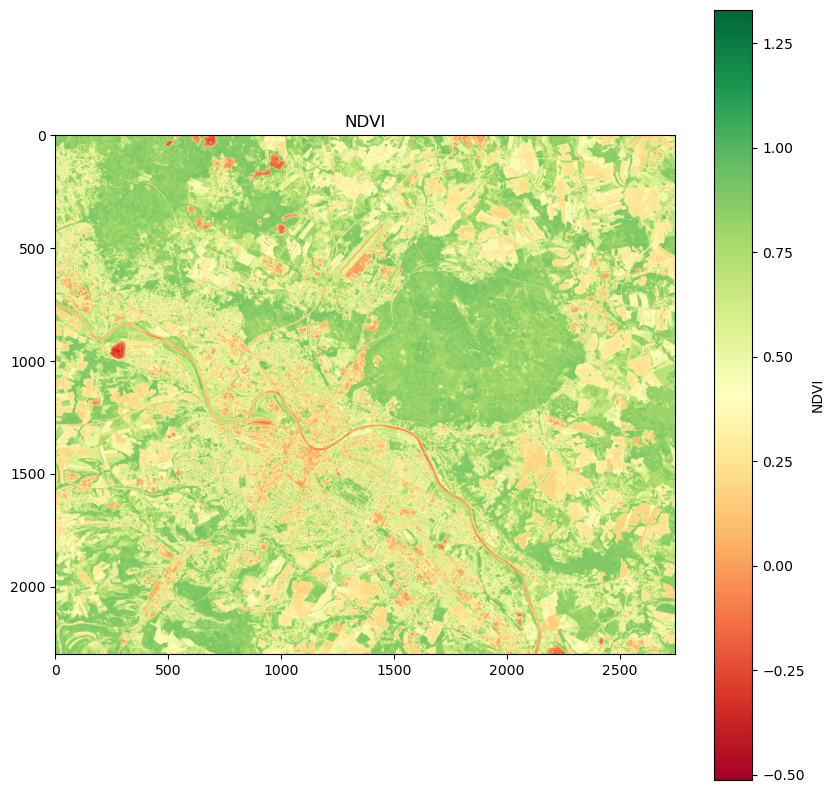

In [38]:
# Read the NIR and Red bands (assuming band 4 is Red and band 8 is NIR)
red = data.sel(band=4)
nir = data.sel(band=8)

# Calculate NDVI
ndvi = (nir - red) / (nir + red)
print(ndvi.max(), ndvi.min())
print(red.max(), red.min())
print(nir.max(), nir.min())

# Plot the NDVI
plt.figure(figsize=(10, 10))
plt.imshow(ndvi, cmap='RdYlGn')
plt.colorbar(label='NDVI')
plt.title('NDVI')
plt.show()

# Calculate NDWI

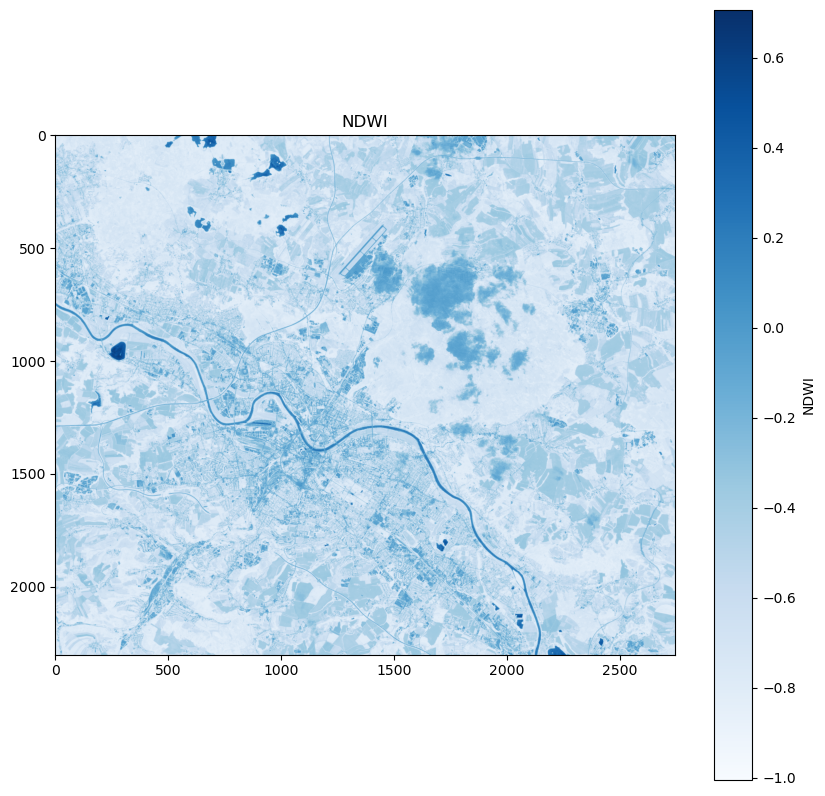

In [30]:
# Read the Green and NIR bands (assuming band 3 is Green and band 8 is NIR)
green = data.sel(band=3)

# Calculate NDWI
ndwi = (green - nir) / (green + nir)

# Plot the NDWI
plt.figure(figsize=(10, 10))
plt.imshow(ndwi, cmap='Blues')
plt.colorbar(label='NDWI')
plt.title('NDWI')
plt.show()